## Machine Learning code

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

### Unsupervised learning

In [ ]:

file_path = './simulation_data_BIG_50k.csv'

# Carica il dataset
data = pd.read_csv(file_path)


features = data[["Run", "Agent_id",'x_position', 'y_position', 'Path_length','last_movement_direction', "n_eaten"]]
labels = data['Agent_kind'].apply(lambda x: 1 if x == 'cat' else 0)

# Converti la caratteristica categoriale in numerica
features = pd.get_dummies(features, columns=['last_movement_direction'])

features.info()



X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardizza le caratteristiche
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47482 entries, 0 to 47481
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Run                         47482 non-null  int64
 1   Agent_id                    47482 non-null  int64
 2   x_position                  47482 non-null  int64
 3   y_position                  47482 non-null  int64
 4   Path_length                 47482 non-null  int64
 5   n_eaten                     47482 non-null  int64
 6   last_movement_direction_0   47482 non-null  bool 
 7   last_movement_direction_E   47482 non-null  bool 
 8   last_movement_direction_N   47482 non-null  bool 
 9   last_movement_direction_NE  47482 non-null  bool 
 10  last_movement_direction_NW  47482 non-null  bool 
 11  last_movement_direction_S   47482 non-null  bool 
 12  last_movement_direction_SE  47482 non-null  bool 
 13  last_movement_direction_SW  47482 non-null  bool 
 14  last_m

In [3]:
# Funzione per valutare i modelli
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, cm

K-Means Clustering Metrics:
Inertia: 516669.6197323083
Silhouette Score: 0.1362238558839633
----------
Accuracy: 0.6198799620932927
Precision: 0.8721582521405373
Recall: 0.48181373348556517
F1 Score: 0.6207186383694053
Confusion Matrix:
[[2933  433]
 [3177 2954]]


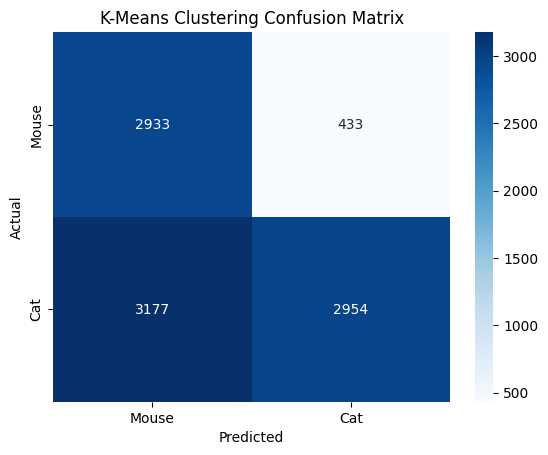

In [19]:
# Usa K-Means clustering per il training (senza etichette)
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 cluster per gatti e topi
kmeans.fit(X_train) 
inertia = kmeans.inertia_

# Silhouette Score
sil_score = silhouette_score(X_train, kmeans.labels_)



train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)

# Valuta le prestazioni del clustering sui dati di test
# Confronta le etichette di cluster con le etichette vere (y_test)
clustering_accuracy = accuracy_score(y_test, test_cluster_labels)
clustering_precision = precision_score(y_test, test_cluster_labels)
clustering_recall = recall_score(y_test, test_cluster_labels)
clustering_f1 = f1_score(y_test, test_cluster_labels)
clustering_cm = confusion_matrix(y_test, test_cluster_labels)


print("K-Means Clustering Metrics:")

print("Inertia:", inertia)
print("Silhouette Score:", sil_score)
print('----------')
print(f"Accuracy: {clustering_accuracy}")
print(f"Precision: {clustering_precision}")
print(f"Recall: {clustering_recall}")
print(f"F1 Score: {clustering_f1}")
print("Confusion Matrix:")
print(clustering_cm)

# Visualizza la matrice di confusione per il clustering
sns.heatmap(clustering_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Mouse", "Cat"], yticklabels=["Mouse", "Cat"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('K-Means Clustering Confusion Matrix')
plt.show()

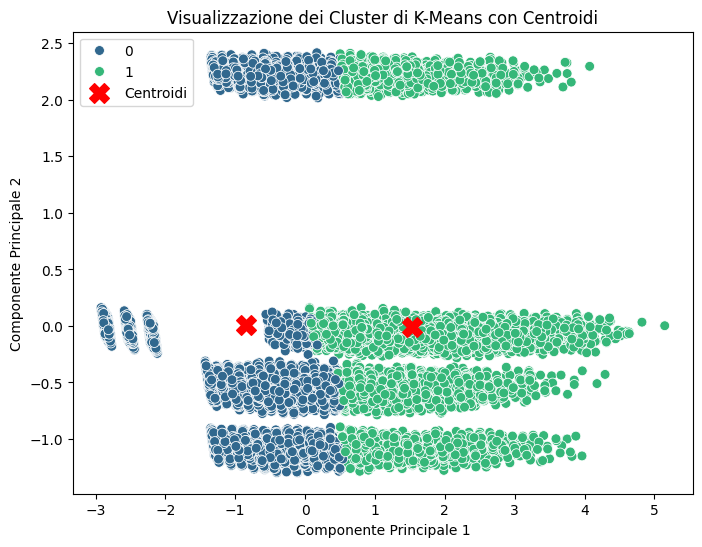

In [21]:
# Riduzione delle dimensioni con PCA (per visualizzare i dati in 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)


cluster_labels = kmeans.labels_


centroids = pca.transform(kmeans.cluster_centers_)


plt.figure(figsize=(8, 6))


sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=50)


plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200, label='Centroidi')

plt.title('Visualizzazione dei Cluster di K-Means con Centroidi')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend()


plt.show()

In [5]:

def use_kmeans_model(file_name):
    '''Function to check if passed dataset contains all columns
    and apply unsupervised learning trained model to classify dataset
    '''
    
   
    file_path = './' + file_name

    
    data = pd.read_csv(file_path)

    
    direction_columns = [
        "last_movement_direction_0", "last_movement_direction_E", 
        "last_movement_direction_N", "last_movement_direction_NE", 
        "last_movement_direction_NW", "last_movement_direction_S", 
        "last_movement_direction_SE", "last_movement_direction_SW", 
        "last_movement_direction_W"
    ]

    
    data = pd.get_dummies(data, columns=['last_movement_direction'], prefix='last_movement_direction')

    
    for col in direction_columns:
        if col not in data.columns:
            data[col] = False

    
    features = data[["Run", "Agent_id", "x_position", "y_position", "Path_length", "n_eaten"] + direction_columns]
    labels = data['Agent_kind'].apply(lambda x: 1 if x == 'cat' else 0)

    
    scaler = StandardScaler()
    X_test = scaler.fit_transform(features)

    
    predictions = kmeans.predict(X_test)

   
    kmeans_metrics = evaluate_model(labels, predictions)

    return kmeans_metrics, predictions



In [ ]:
# Usa KNN, Random Forest e Decision Tree per valutare le prestazioni del clustering
# Addestra i modelli supervisionati sulle etichette di cluster (non sulle etichette vere)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)


knn_scores = cross_val_score(knn, X_train, train_cluster_labels, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf, X_train, train_cluster_labels, cv=5, scoring='accuracy')
dt_scores = cross_val_score(dt, X_train, train_cluster_labels, cv=5, scoring='accuracy')


print("\nCross-Validation Results:")
print(f"KNN Accuracy: {knn_scores.mean():.4f} (±{knn_scores.std():.4f})")
print(f"Random Forest Accuracy: {rf_scores.mean():.4f} (±{rf_scores.std():.4f})")
print(f"Decision Tree Accuracy: {dt_scores.mean():.4f} (±{dt_scores.std():.4f})")


knn.fit(X_train, train_cluster_labels)
rf.fit(X_train, train_cluster_labels)
dt.fit(X_train, train_cluster_labels)

# Effettua le predizioni sui dati di test
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)


Cross-Validation Results:
KNN Accuracy: 0.9775 (±0.0015)
Random Forest Accuracy: 0.9967 (±0.0004)
Decision Tree Accuracy: 0.9963 (±0.0006)


In [7]:
# Valuta i modelli supervisionati rispetto alle etichette di cluster
knn_metrics = evaluate_model(test_cluster_labels, knn_pred)
rf_metrics = evaluate_model(test_cluster_labels, rf_pred)
dt_metrics = evaluate_model(test_cluster_labels, dt_pred)

print("\nKNN Metrics (Evaluated on Cluster Labels):")
print(f"Accuracy: {knn_metrics[0]}")
print(f"Precision: {knn_metrics[1]}")
print(f"Recall: {knn_metrics[2]}")
print(f"F1 Score: {knn_metrics[3]}")
print("Confusion Matrix:")
print(knn_metrics[4])

print("\nRandom Forest Metrics (Evaluated on Cluster Labels):")
print(f"Accuracy: {rf_metrics[0]}")
print(f"Precision: {rf_metrics[1]}")
print(f"Recall: {rf_metrics[2]}")
print(f"F1 Score: {rf_metrics[3]}")
print("Confusion Matrix:")
print(rf_metrics[4])

print("\nDecision Tree Metrics (Evaluated on Cluster Labels):")
print(f"Accuracy: {dt_metrics[0]}")
print(f"Precision: {dt_metrics[1]}")
print(f"Recall: {dt_metrics[2]}")
print(f"F1 Score: {dt_metrics[3]}")
print("Confusion Matrix:")
print(dt_metrics[4])




KNN Metrics (Evaluated on Cluster Labels):
Accuracy: 0.9793619037590818
Precision: 0.974709907765546
Recall: 0.9672276350752879
F1 Score: 0.970954356846473
Confusion Matrix:
[[6025   85]
 [ 111 3276]]

Random Forest Metrics (Evaluated on Cluster Labels):
Accuracy: 0.9972622933557965
Precision: 0.9941193766539254
Recall: 0.9982285208148804
F1 Score: 0.9961697112551562
Confusion Matrix:
[[6090   20]
 [   6 3381]]

Decision Tree Metrics (Evaluated on Cluster Labels):
Accuracy: 0.9967358113088344
Precision: 0.9955699940933255
Recall: 0.9952760555063478
F1 Score: 0.9954230031005463
Confusion Matrix:
[[6095   15]
 [  16 3371]]


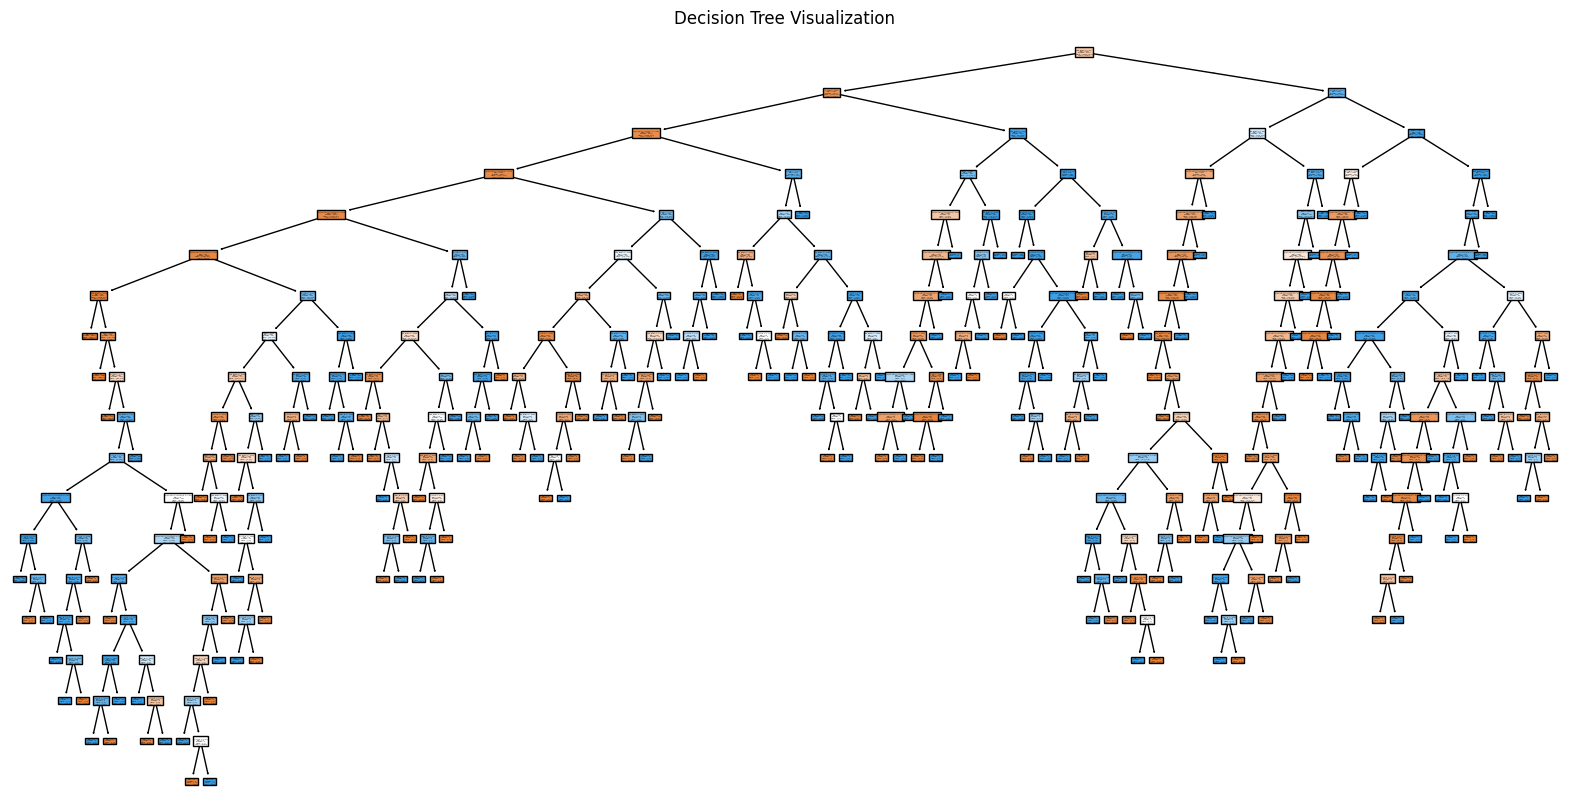

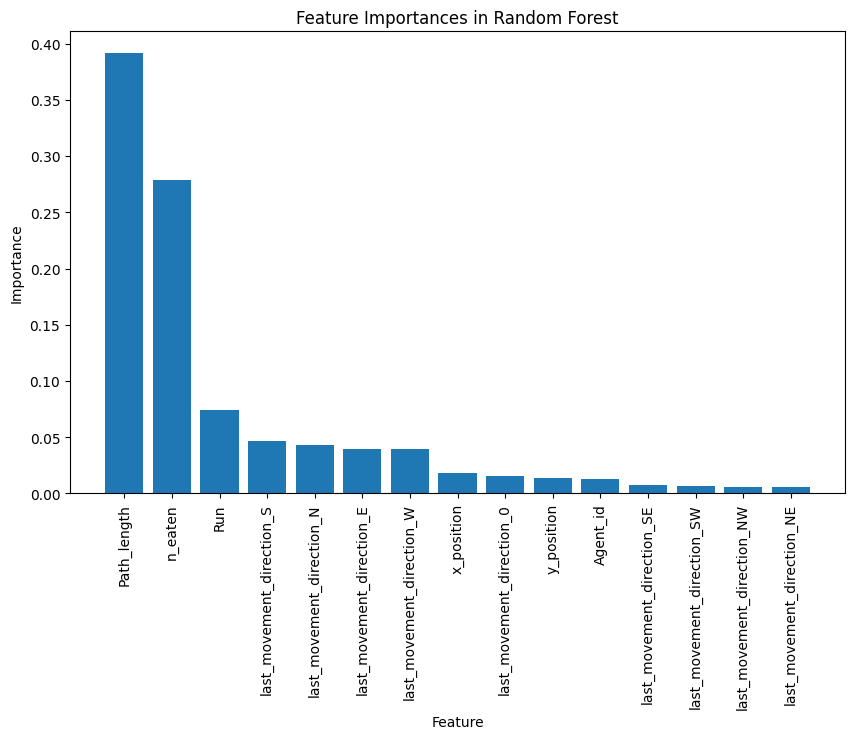

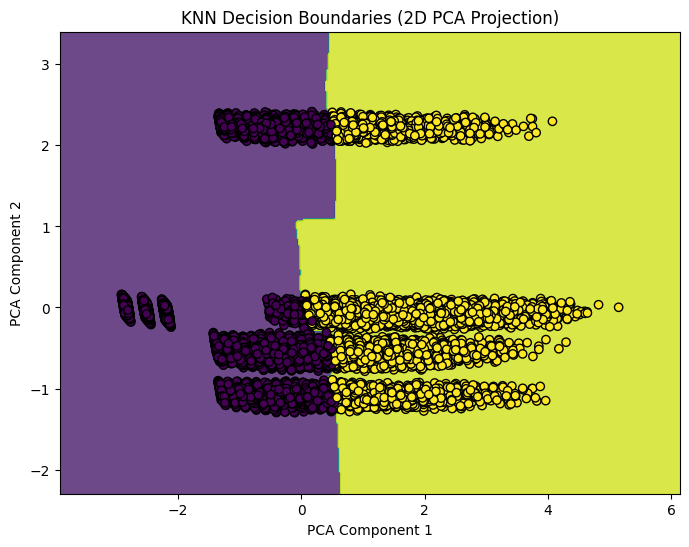

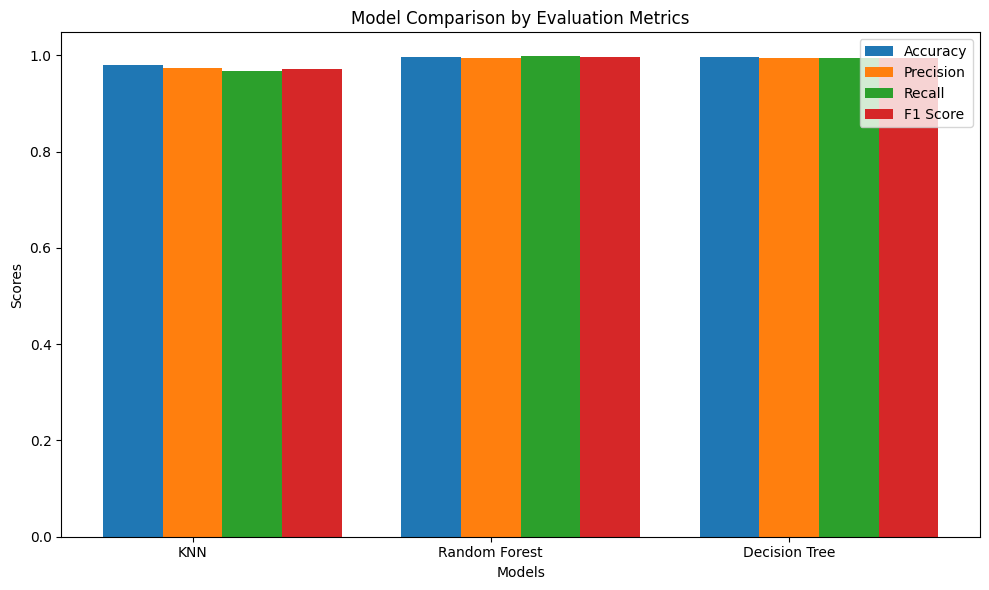

In [ ]:
# Visualizzazione

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=features.columns, class_names=["Cluster 0", "Cluster 1"])
plt.title("Decision Tree Visualization")
plt.show()


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()



if X_train.shape[1] > 2:
   
    pca = PCA(n_components=2)
    X_train_2D = pca.fit_transform(X_train)
    X_test_2D = pca.transform(X_test)
    knn.fit(X_train_2D, train_cluster_labels)  
    h = .02  
    x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
    y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=train_cluster_labels, edgecolor='k', marker='o')
    plt.title("KNN Decision Boundaries (2D PCA Projection)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


models = ['KNN', 'Random Forest', 'Decision Tree']
accuracy = [knn_metrics[0], rf_metrics[0], dt_metrics[0]]
precision = [knn_metrics[1], rf_metrics[1], dt_metrics[1]]
recall = [knn_metrics[2], rf_metrics[2], dt_metrics[2]]
f1 = [knn_metrics[3], rf_metrics[3], dt_metrics[3]]

x = np.arange(len(models)) 
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, precision, width, label='Precision')
rects3 = ax.bar(x + width, recall, width, label='Recall')
rects4 = ax.bar(x + 2*width, f1, width, label='F1 Score')


ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison by Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()

### Supervised Learning

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:

file_path = './simulation_data_BIG_50k.csv'

# Carica il dataset
data = pd.read_csv(file_path)

features = data[["Run", "Agent_id",'x_position', 'y_position', 'Path_length','last_movement_direction', "n_eaten"]]
labels = data['Agent_kind'].apply(lambda x: 1 if x == 'cat' else 0)

features = pd.get_dummies(features, columns=['last_movement_direction'])


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardizza le caratteristiche
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN Metrics:
Accuracy: 0.7321259345056333
Precision: 0.7879274361855836
Recall: 0.8005219376936878
F1 Score: 0.7941747572815534
Confusion Matrix:
[[2045 1321]
 [1223 4908]]

Random Forest Metrics:
Accuracy: 0.8916499947351796
Precision: 0.9180596525729269
Recall: 0.9137171750122329
F1 Score: 0.9158832665740211
Confusion Matrix:
[[2866  500]
 [ 529 5602]]

Decision Tree Metrics:
Accuracy: 0.9931557333894914
Precision: 0.9944571242256276
Recall: 0.9949437285923993
F1 Score: 0.9947003668976763
Confusion Matrix:
[[3332   34]
 [  31 6100]]


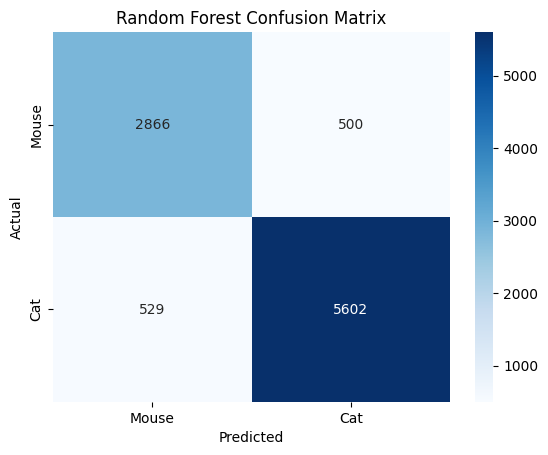

In [ ]:
# Creazione e addestramento modelli
knn_s = KNeighborsClassifier()
rf_s = RandomForestClassifier(random_state=42)
dt_s = DecisionTreeClassifier(random_state=42)


knn_s.fit(X_train, y_train)
rf_s.fit(X_train, y_train)
dt_s.fit(X_train, y_train)


knn_pred = knn_s.predict(X_test)
rf_pred = rf_s.predict(X_test)
dt_pred = dt_s.predict(X_test)


knn_metrics = evaluate_model(y_test, knn_pred)
rf_metrics = evaluate_model(y_test, rf_pred)
dt_metrics = evaluate_model(y_test, dt_pred)

print("KNN Metrics:")
print(f"Accuracy: {knn_metrics[0]}")
print(f"Precision: {knn_metrics[1]}")
print(f"Recall: {knn_metrics[2]}")
print(f"F1 Score: {knn_metrics[3]}")
print("Confusion Matrix:")
print(knn_metrics[4])

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_metrics[0]}")
print(f"Precision: {rf_metrics[1]}")
print(f"Recall: {rf_metrics[2]}")
print(f"F1 Score: {rf_metrics[3]}")
print("Confusion Matrix:")
print(rf_metrics[4])

print("\nDecision Tree Metrics:")
print(f"Accuracy: {dt_metrics[0]}")
print(f"Precision: {dt_metrics[1]}")
print(f"Recall: {dt_metrics[2]}")
print(f"F1 Score: {dt_metrics[3]}")
print("Confusion Matrix:")
print(dt_metrics[4])


cm_rf = rf_metrics[4]
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Mouse", "Cat"], yticklabels=["Mouse", "Cat"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [12]:
def use_supervised_learning(file_name):
    '''Function to check if passed dataset contains all columns
    and apply supervised learning trained models to classify dataset
    '''
    
    file_path = './' + file_name

    
    data = pd.read_csv(file_path)

    
    direction_columns = [
        "last_movement_direction_0", "last_movement_direction_E", 
        "last_movement_direction_N", "last_movement_direction_NE", 
        "last_movement_direction_NW", "last_movement_direction_S", 
        "last_movement_direction_SE", "last_movement_direction_SW", 
        "last_movement_direction_W"
    ]

    
    data = pd.get_dummies(data, columns=['last_movement_direction'], prefix='last_movement_direction')

    
    for col in direction_columns:
        if col not in data.columns:
            data[col] = False

    
    features = data[["Run", "Agent_id", "x_position", "y_position", "Path_length", "n_eaten"] + direction_columns]
    labels = data['Agent_kind'].apply(lambda x: 1 if x == 'cat' else 0)
    features.info()
    
    scaler = StandardScaler()
    X_test = scaler.fit_transform(features)
    
    knn_predictions = knn_s.predict(X_test)
    knn_metrics = evaluate_model(labels, knn_predictions)
    
    rf_predictions = rf_s.predict(X_test)
    rf_metrics = evaluate_model(labels, rf_predictions)
    
    dt_predictions = dt_s.predict(X_test)
    dt_metrics = evaluate_model(labels, dt_predictions)
    
    plt.figure(figsize=(20,10))
    plot_tree(dt_s, filled=True, feature_names=features.columns, class_names=["Cluster 0", "Cluster 1"])
    plt.title("Decision Tree Visualization")
    plt.show()
     
    
    return knn_metrics, knn_predictions, rf_metrics, rf_predictions, dt_metrics, dt_predictions



-----

# Excecution

In [13]:
import import_ipynb
import miceAndCats_simulation as simulation

<string>:166: SyntaxWarning: invalid escape sequence '\_'
<string>:182: SyntaxWarning: invalid escape sequence '\_'


In [14]:
RANDOM_SEED = 40
env = simulation.Envirement(i = 15, j= 20, C = 12, H = 15, M = 17, random_seed = RANDOM_SEED, vision_range= 4, beta = 3.2, k = 3, total_run = 2, uniform_speed = False)

file_name = env.run(False)
env.display_final_statistics(verbose = True, path = True)

Execution terminated.
Data have been successfully collected in simulation_data_2025-01-26_16-09.csv.


------------FINAL STATISTICS------------
All Mice are DEAD!
CATS HAVE WON!

                /\_/\  
                ( o.o ) 
                > ^ <
                


~~~~~~~~~~~More details~~~~~~~~~~~


----------MICE---------
Mouse with ID 14 death status is: True and has eaten 1 pieces of cheese.
 It traveled for 4 cells.
Mouse speed: 2
Mouse Path (path length, x, y, last movement direction, eaten): 
[(0, 3, 13, '0', 0), (1, 2, 12, 'SE', 0), (2, 5, 5, 'S', 1), (3, 5, 3, 'W', 1)]


Mouse with ID 18 death status is: True and has eaten 0 pieces of cheese.
 It traveled for 2 cells.
Mouse speed: 3
Mouse Path (path length, x, y, last movement direction, eaten): 
[(0, 2, 18, '0', 0), (1, 1, 18, 'N', 0)]


Mouse with ID 28 death status is: True and has eaten 0 pieces of cheese.
 It traveled for 4 cells.
Mouse speed: 3
Mouse Path (path length, x, y, last movement direction, eaten): 
[(0, 3, 

-------UNSUPERVISED LEARNING-------
[0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1
 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0]

K-means Metrics on input dataset:
Accuracy: 0.6325581395348837
Precision: 0.6987951807228916
Recall: 0.5178571428571429
F1 Score: 0.5948717948717949
Confusion Matrix:


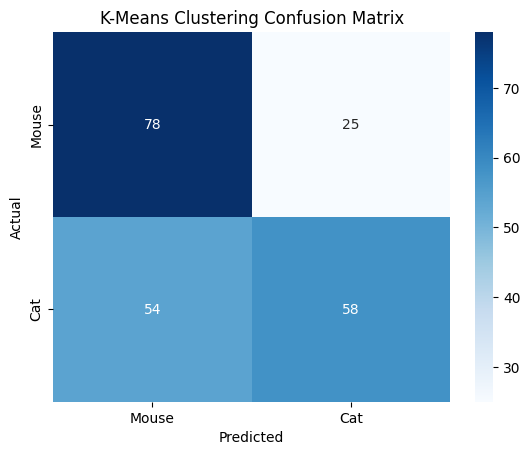

In [ ]:
kmeans_metrics, predictions = use_kmeans_model(file_name)

print('-------UNSUPERVISED LEARNING-------')
print(predictions)

print("\nK-means Metrics on input dataset:")
print(f"Accuracy: {kmeans_metrics[0]}")
print(f"Precision: {kmeans_metrics[1]}")
print(f"Recall: {kmeans_metrics[2]}")
print(f"F1 Score: {kmeans_metrics[3]}")
print("Confusion Matrix:")
sns.heatmap(kmeans_metrics[4], annot=True, fmt="d", cmap="Blues", xticklabels=["Mouse", "Cat"], yticklabels=["Mouse", "Cat"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('K-Means Clustering Confusion Matrix')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Run                         215 non-null    int64
 1   Agent_id                    215 non-null    int64
 2   x_position                  215 non-null    int64
 3   y_position                  215 non-null    int64
 4   Path_length                 215 non-null    int64
 5   n_eaten                     215 non-null    int64
 6   last_movement_direction_0   215 non-null    bool 
 7   last_movement_direction_E   215 non-null    bool 
 8   last_movement_direction_N   215 non-null    bool 
 9   last_movement_direction_NE  215 non-null    bool 
 10  last_movement_direction_NW  215 non-null    bool 
 11  last_movement_direction_S   215 non-null    bool 
 12  last_movement_direction_SE  215 non-null    bool 
 13  last_movement_direction_SW  215 non-null    bool 
 14  last_movem

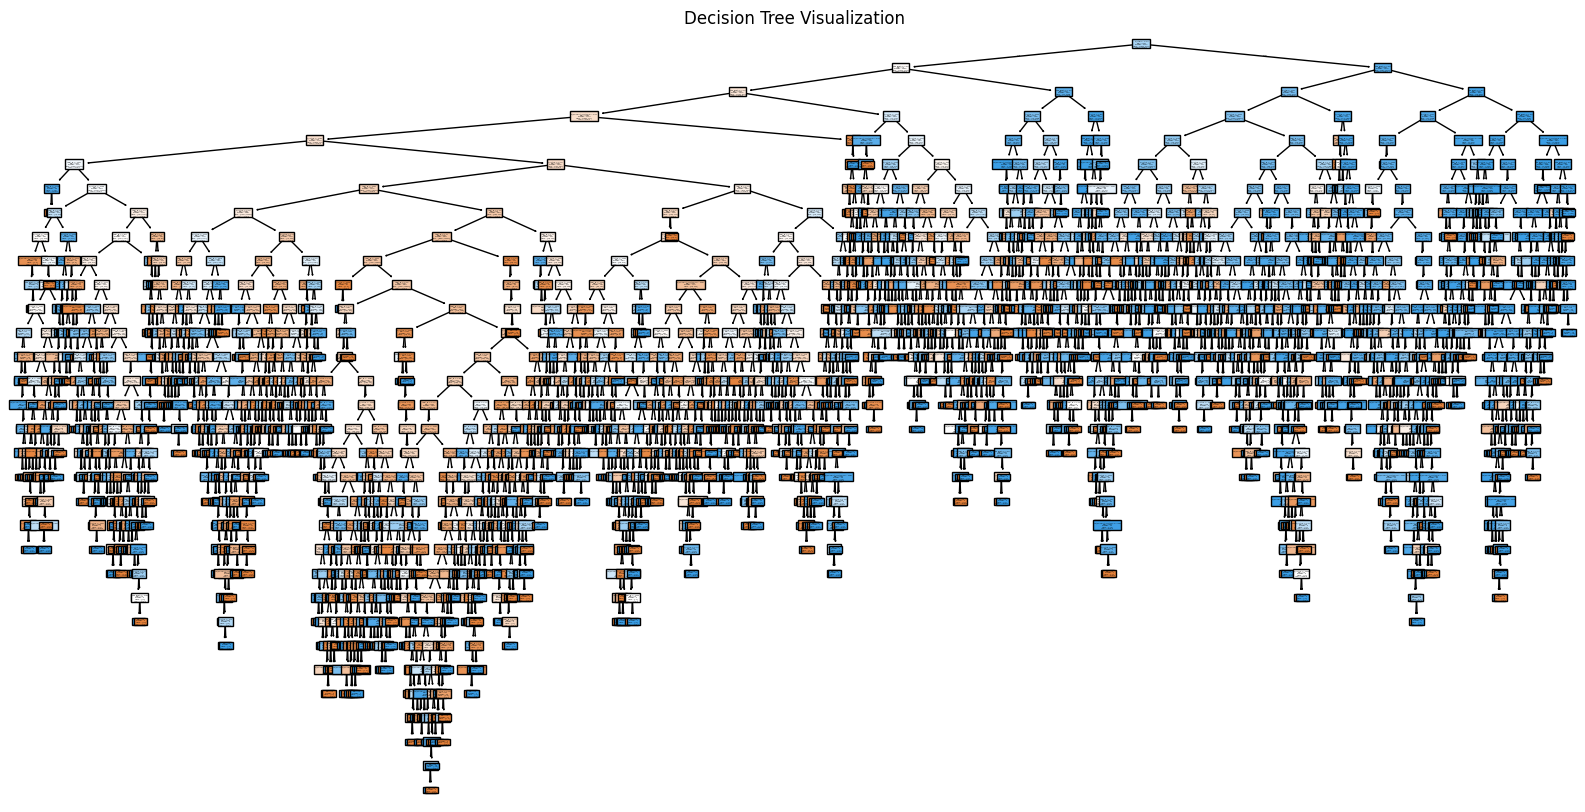

-------SUPERVISED LEARNING-------
KNN Metrics:
Accuracy: 0.6
Precision: 0.5984848484848485
Recall: 0.7053571428571429
F1 Score: 0.6475409836065574
Confusion Matrix:
[[50 53]
 [33 79]]

Random Forest Metrics:
Accuracy: 0.627906976744186
Precision: 0.6194029850746269
Recall: 0.7410714285714286
F1 Score: 0.6747967479674797
Confusion Matrix:
[[52 51]
 [29 83]]

Decision Tree Metrics:
Accuracy: 0.6
Precision: 0.6015625
Recall: 0.6875
F1 Score: 0.6416666666666667
Confusion Matrix:
[[52 51]
 [35 77]]


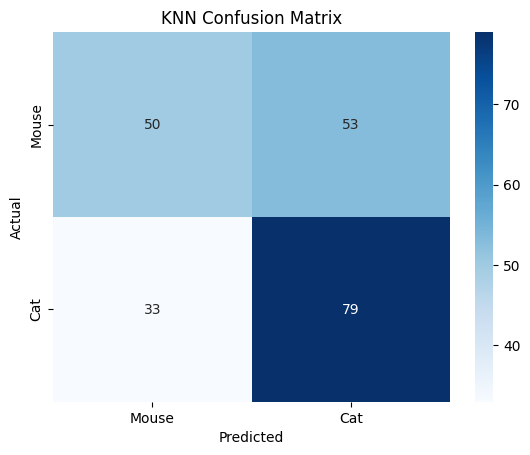

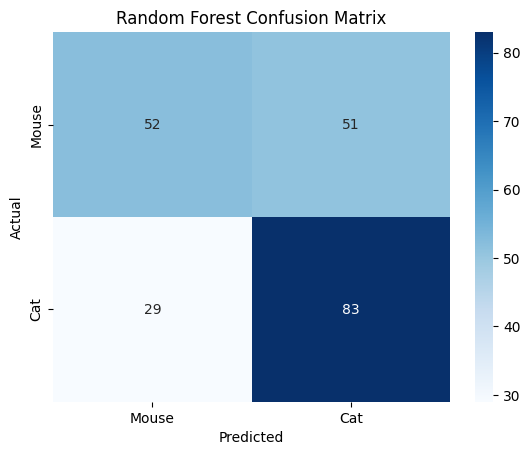

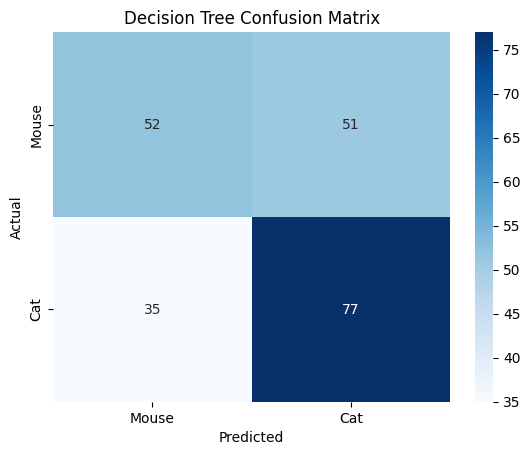

In [ ]:
knn_metrics, knn_predictions, rf_metrics, rf_predictions, dt_metrics, dt_predictions = use_supervised_learning(file_name)

print('-------SUPERVISED LEARNING-------')

print("KNN Metrics:")
print(f"Accuracy: {knn_metrics[0]}")
print(f"Precision: {knn_metrics[1]}")
print(f"Recall: {knn_metrics[2]}")
print(f"F1 Score: {knn_metrics[3]}")
print("Confusion Matrix:")
print(knn_metrics[4])

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_metrics[0]}")
print(f"Precision: {rf_metrics[1]}")
print(f"Recall: {rf_metrics[2]}")
print(f"F1 Score: {rf_metrics[3]}")
print("Confusion Matrix:")
print(rf_metrics[4])

print("\nDecision Tree Metrics:")
print(f"Accuracy: {dt_metrics[0]}")
print(f"Precision: {dt_metrics[1]}")
print(f"Recall: {dt_metrics[2]}")
print(f"F1 Score: {dt_metrics[3]}")
print("Confusion Matrix:")
print(dt_metrics[4])


cm_knn = knn_metrics[4]
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Mouse", "Cat"], yticklabels=["Mouse", "Cat"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('KNN Confusion Matrix')
plt.show()


cm_rf = rf_metrics[4]
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Mouse", "Cat"], yticklabels=["Mouse", "Cat"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
plt.show()

cm_dt = dt_metrics[4]
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Mouse", "Cat"], yticklabels=["Mouse", "Cat"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree Confusion Matrix')
plt.show()
